f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1. Определить корни

2. Найти интервалы, на которых функция возрастает

3. Найти интервалы, на которых функция убывает

4. Построить график

5. Вычислить вершину

6. Определить промежутки, на котором f > 0

7. Определить промежутки, на котором f < 0

## Задача №1
Пытаемся определить корни функции
Сначала попробуем определить корни очень примерно, на глаз, построив график функции

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

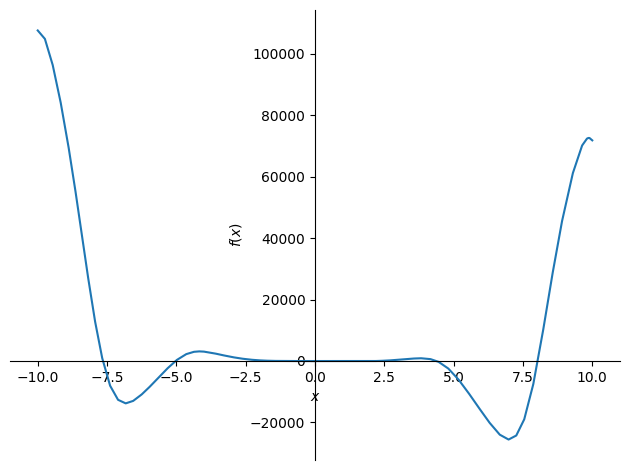

In [2]:
x = sympy.Symbol('x')
fx = -12*x**4*sympy.sin(sympy.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
sympy.plot(fx)

Видим, что пересечений оси y достаточно много, попробуем уменьшитьь масштаб

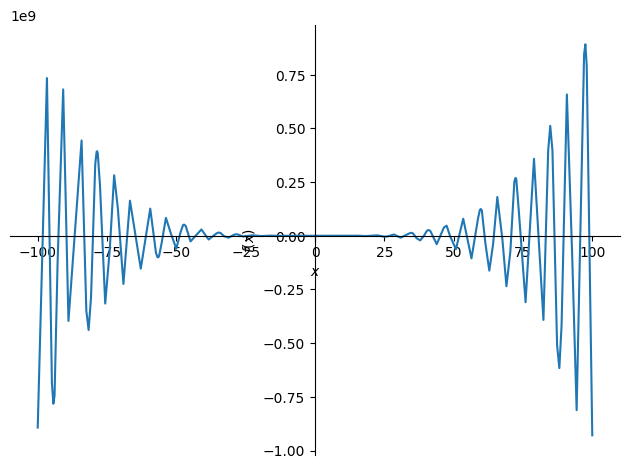

In [3]:
sympy.plot(fx, (x, -100, 100))

Делаем вывод, что у функции бесконечное количество корней

Библиотека sympy не умеет вычислять такие корни, поэтому рассмотрим какой-то маленький отрезок, например x=[48, 53]
И будем вычислять корни функции на этом отрезке численными методами

In [5]:
def f(x):
    return (-12*x**4*np.sin(np.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30)

#x = np.linspace(48, 53, 1001)

root1 = optimize.root(f, x0=48)
root2 = optimize.root(f, x0=53)
print(f"Корни функции на отрезке [48, 53] : {root1.x}, {root2.x}")

Корни функции на отрезке [48, 53] : [48.66403568], [51.86504741]


## Задача №2 и №3
Найти интервалы, на которых функция возрастает и убывает

Сначала определим вершину графика на этом рисунке

Сначала смотрим визуально, для этого вычисляем производную и смотрим ее корень:

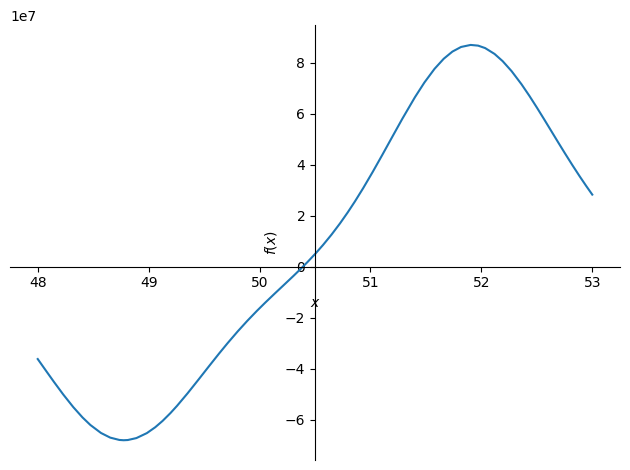

In [4]:
df = sympy.diff(fx, x)
sympy.plot(df, (x, 48, 53))

## Задача №5
Видим, что корень функции примерно равен 50.3, найдем его более точно численным методом:

In [6]:
minf = optimize.minimize(f, x0=48, bounds=((48, 53), ))
print(minf.x)

[50.39056495]


Соостветственно, функция убывает при 

```
x < minf.x
```

а возрастает при

```
x > minf.x
```
## Задача №4
Построим правильный график на этом отрезке:

In [10]:
x_range_down = np.arange(48, minf.x, 0.001)
x_range_up = np.arange(minf.x, 53, 0.001)
x = np.arange(48, 53, 0.001)

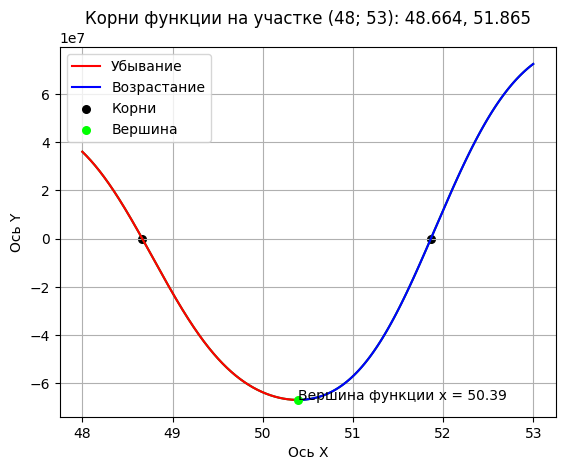

In [11]:

plt.title(f'Корни функции на участке (48; 53): {round(float(root1.x), 3)}, {round(float(root2.x), 3)}')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid()
plt.plot(x, f(x), 'g')
plt.plot(x_range_down, f(x_range_down), 'r', label="Убывание")
plt.plot(x_range_up, f(x_range_up), 'b', label="Возрастание")
plt.text(float(minf.x), float(f(minf.x)) + 30, f'Вершина функции x = {round(float(minf.x) , 2)}')
plt.scatter([root1.x], [f(root1.x)], 30, label='Корни', color='#000000')
plt.scatter([root2.x], [f(root2.x)], 30, color='#000000')
plt.scatter([minf.x], [f(minf.x)], 30, label='Вершина', zorder=2, color='#00FF00')
plt.legend()
plt.show()

## Задача №6 и №7

Соответственно, функия f > 0 за гранизами корней
А f < 0 внутри границ корней:

In [9]:
print(f"f > 0 при x < {root1.x} и при x > {root2.x}")
print(f"f < 0 при {root1.x} < x < {root2.x}")

f > 0 при x < [48.66403568] и при x > [51.86504741]
f < 0 при [48.66403568] < x < [51.86504741]
